# Regresiones Robustas

📌 Las regresiones robustas son métodos de regresión diseñados para ser **menos sensibles** a datos atípicos.

🎯 Objetivo de las regresiones robustas es minimizar el impacto de los outliers en el modelo.


**¿Cómo funcionan?**

- **Función de perdida**: Utilizan funciones de perdida que penalizan errores grandes de manera menos severa.
A diferencia de la regresión tradicional que utiliza suma de los errores al cuadrado (MSE)
- **Reduce los pesos de los outliers**: Identifica los outliers y ajusta el modelo solo con los inliers (valores normales).


**🟢 RANSAC (RANdom SAmple Consensus)** <br>
Algoritmo iterativo que busca encontrar al mejor modelo que se ajuste a los datos “limpios” (inliers), ignorando a los outliers.

> 💡 Deja por fuera a los valores atípicos.

**¿Cómo funcionan?**

1. **Selección aleatoria**: Selecciona aleatoriamente un subconjunto mínimo de datos necesarios para entrenar al modelo.
2. **Ajuste del modelo**: Se ajusta el modelo a ese subconjunto de datos.
3. **Evaluación**: Determina cuantos puntos del conjunto completo son inliers (dentro de un umbral de error).
4. **Iteración**: Repite el proceso muchas veces.
5. **Selección**: Elige el modelo con mayor número de inliers.


**🟢 Huber Regressor** <br>
La regresión de Huber utiliza una función de perdida híbrida que combina la suma de los errores absolutos (**L1** - **Lasso**) para errores grandes y la suma de los errores al cuadrado (**L2** - **Ridge**) para errores pequeños.

> 💡 Penaliza los valores atípicos según su magnitud. 

**¿Cómo funcionan?**

1. Errores **pequeños** ($|error| < \epsilon$): Perdida cuadrática (mínimos cuadrados). Asegura una buena eficiencia cuando los datos no tienen outliers.
2. Errores **grandes** ($|error| > \epsilon$): Perdida lineal  (MAE - Minimum Absolute Error). Reduce la penalización de los outliers, haciendo al modelo menos sensible a ellos.


Donde $\epsilon$: Umbral que define qué tan grande debe ser el error para tratarlo como un outlier.


> 💡 Se ha demostrado que el valor de epsilon = 1.35 logra un 95% de eficiencia estadística.

## Implementación con Scikit-Learn

<div class="alert alert-info", role="alert">
    <h5>⚠️</h5>
    <p>
      El ejemplo desglosado a continuación sigue paso a paso la implementación que se realizó en el curso, solo con unos detalles adicionales. <br>
			Especificamente en la clase <a href="https://platzi.com/cursos/scikitlearn/preparacion-de-datos-para-la-regresion-robusta/"> 
				Regresión Lineal y Sorporte Vectorial: Manejo de Datos Atípicos</a>
				<br>
				🎯 El objetivo del ejercicio es comparar diferetnes tipso de regresiones robustas, para llevarlo a cabo se utiliza el dataset World Happiness del año 2017; sin embargo el dataset se alteró para añadirle ruido (datos atípicos) por cuestiones didacticas para el ejercicio.
    </p>
</div>

Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Regresiones robustas
from sklearn.linear_model import RANSACRegressor, HuberRegressor
from sklearn.svm import SVR

# Separación de los datos en entrenamiento y pruebas
from sklearn.model_selection import train_test_split

# Fución de perdida -> Calcular el error del modelo.
from sklearn.metrics import mean_squared_error

In [2]:
%run 0.0-ml_professional-setup.ipynb

Importamos los datos de valores atípicos para el ejercicio.

In [3]:
file_path = path.data_raw_dir("2017.csv")
df = pd.read_csv(file_path)

df.columns = ["country","rank","score","high","low","gdp","family","lifexp","freedom","generosity","corruption","dystopia"]

In [4]:
corrupted = {
	"country": ["A","B","C","D","E","F","G","H","I","J","K","L"],
	"rank": np.arange(start=len(df)+1, stop=len(df)+13),
	"score": np.zeros(12),
	"high": np.zeros(12),
	"low": np.zeros(12),
	"gdp": np.zeros(12),
	"family": np.zeros(12),
	"lifexp": np.zeros(12),
	"freedom": np.zeros(12),
	"generosity": np.zeros(12),
	"corruption": np.zeros(12),
	"dystopia": np.zeros(12)
}
df_corrupted = pd.concat([df, pd.DataFrame(corrupted)], ignore_index=True)
df_corrupted.tail()

,country,rank,score,high,low,gdp,family,lifexp,freedom,generosity,corruption,dystopia
162,H,163,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
163,I,164,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,J,165,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,K,166,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,L,167,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Preparación de los datos para entrenar a los modelos:

In [5]:
X = df_corrupted.drop(columns=["country", "score"], axis=1)
y = df_corrupted[["score"]]

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3, random_state=42)

Creamos los estimadores:

In [6]:
estimators = {
	"RANSAC": RANSACRegressor(),
	"Huber": HuberRegressor(epsilon=1.3),
	"SVR": SVR(gamma="auto", C=1, epsilon=.1)
}

Entrenamiento y evaluación:

In [7]:
# Ocultar warnings
import warnings
warnings.simplefilter("ignore")

================ RANSAC ================
Error: 5.1593582983882794e-26

================ Huber =================
Error: 8.216032972447973e-07

================= SVR ==================
Error: 0.07455771298700416



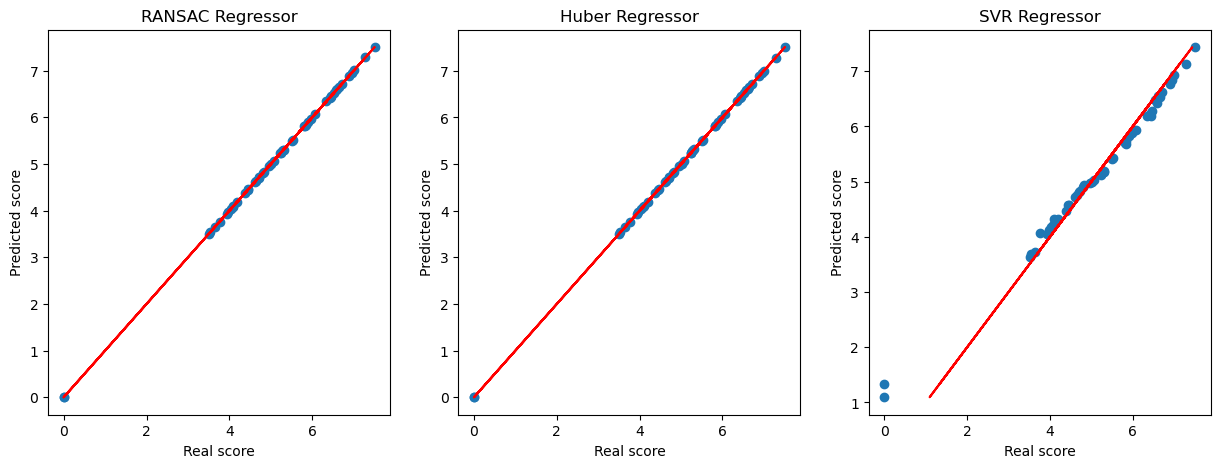

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15,5))

for estimator, ax in zip(estimators.items(), axes):
  name, est = estimator
  est.fit(X_train, y_train)
  prediction = est.predict(X_test)
  
  # Metricas
  error = mean_squared_error(y_test, prediction)
  print(f" {name} ".center(40, "="))
  print(f"Error: {error}\n")
  
  ax.scatter(y_test, prediction)
  ax.plot(prediction, prediction, "r")
  ax.set_xlabel("Real score")
  ax.set_ylabel("Predicted score")
  ax.set_title(f"{name} Regressor")

De los estimadores, o regresiones robustas implementadas, RASNSAC fue la que obtuvó un error mucho más bajo que Huber y SVR, al menos para este ejemplo, la mejor regresión robusta fue RANSAC.


Es importante siempre estar atentos a los outliers que puedan llegar a tener nuestros datos, y en como estos pueden llegar a afectar el rendimiento del modelo es crucial para obtener modelos fiables.